<a href="https://colab.research.google.com/github/eggtgg/bt_minhtriho_all/blob/main/bt_vat/thuc_hanh_o_nha_5_5_21_huong_dan_du_lieu_ANOVA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DỮ LIỆU DÙNG CHO KIỂM ĐỊNH ANOVA MỘT CHIỀU

ANOVA là viết tắt của Analysis of Variance. Đây là một kiểm định thống kê dùng để phân tích sự khác biệt về đại lượng trung bình của 3 nhóm phan biệt trở lên.

1. Trường hợp sử dụng ANOVA một chiều

ANOVA một chiều được sử dụng khi bạn thu thập dữ liệu về một biến độc lập (định tính) kiểu phân loại (categorical data) và một biến phụ thuộc kiểu định lượng. Biến độc lập phải phải có tối thiểu 3 mức (hay tối thiểu 3 nhóm hay ba phân loại tùy theo cách gọi trong từng trường hợp).

ANOVA cho biết xem thử biến phụ thuộc thay đổi theo các mức độ của biến độc lập như thế nào. Ví dụ:

- Biến độc lập là việc sử dụng công cụ truyền thông, và bạn gán các nhóm là thấp, trung bình và cao để tìm ra xem thử ở đây có sự khác biệt nào (tính theo giờ sử dụng) hàng đêm hay không.
- Biến độc lập là nhãn hàng các đồ uống gồm Coke, Pepsi, Sprite, và Fanta và cố tìm xem thử có sự khác biệt nào về giá cả các đồ uống này xét theo đơn vị lon 100ml hay không.
- Biến độc lập là các loại phân bón và bạn bón từng loại phân cho từng cánh đồng và xem xét sự khác biệt.


In [2]:
import numpy as np
import pandas as pd

In [19]:
np.random.seed(1234)
#Xây dựng dữ liệu mô phỏng
social_levels = ['low', 'medium', 'high']
social_use = np.random.choice(social_levels, 100, p = [0.2, 0.5, 0.3])
hours = np.random.choice(8, 100)

In [49]:
hours

array([4, 5, 5, 1, 0, 0, 5, 3, 7, 4, 0, 0, 5, 1, 0, 6, 3, 1, 1, 6, 1, 3,
       3, 7, 1, 3, 4, 4, 5, 4, 1, 3, 6, 5, 1, 6, 6, 2, 1, 0, 7, 0, 4, 4,
       0, 0, 7, 7, 1, 5, 5, 6, 5, 3, 1, 7, 4, 7, 7, 1, 7, 3, 2, 3, 5, 2,
       7, 2, 6, 0, 6, 1, 1, 7, 3, 3, 4, 3, 2, 4, 2, 1, 3, 7, 2, 0, 1, 1,
       3, 6, 4, 3, 4, 2, 3, 1, 7, 5, 7, 0])

In [21]:
df = pd.DataFrame({'Social Use': social_use, 'Hour Use': hours})
df

,Social Use,Hour Use
0,low,4
1,medium,5
2,medium,5
3,high,1
4,high,0
...,...,...
95,medium,1
96,medium,7
97,high,5
98,low,7


Bạn thấy dữ liệu mô phỏng ở trên bất hợp lý ở điểm nào? Nếu có thì bạn hãy chỉnh sửa lại

dữ liệu sinh hoàn toàn ngẫu nhiên điều này khiến Hour use quá phi thực thế và không phù hợp với ba mức low, medium, và high

In [51]:
np.random.seed(1234)
#Xây dựng dữ liệu mô phỏng
social_levels_new = ['low', 'medium', 'high']
social_use_new = np.random.choice(social_levels, 100, p = [0.2, 0.5, 0.3])
hours_new = []
for i in social_use_new:
    if i == 'low':
        hours_new.append(np.random.randint(0,5))
    else:
        if i == 'medium':
            hours_new.append(np.random.randint(1,7))
        else:
            hours_new.append(np.random.randint(3,8))

In [56]:
df_new = pd.DataFrame({'Social Use': social_use_new, 'Hour Use': hours_new})
df_new.head(10)

,Social Use,Hour Use
0,low,4
1,medium,6
2,medium,6
3,high,4
4,high,3
5,medium,1
6,medium,6
7,high,6
8,high,7
9,high,3


Xây dựng giả thuyết
$$H_{0}: \mu_{1} = \mu_{2} = ... = \mu_{n}$$
$$H_{a}: \text{Tồn tại ít nhất một cặp } (\mu_{i}, \mu_{j}) \text{ có giá trị khác nhau}$$

*Hãy* xây dựng dữ liệu mô phỏng cho ví dụ sau:

Xét điểm trung bình (GPA) của sinh viên đại học năm 1 - 2 - 3 - 4. Hay nói cách khác là chúng ta nghiên cứu về mối quan hệ giữa năm học và điểm trung bình. Như vậy chúng ta có 4 nhóm sinh viên: năm 1, năm 2, năm 3 và năm 4.

* $\mu_{1}$ : điểm trung bình của sinh viên năm 1
* $\mu_{2}$ : điểm trung bình của sinh viên năm 2
* $\mu_{3}$ : điểm trung bình của sinh viên năm 3
* $\mu_{4}$ : điểm trung bình của sinh viên năm 4

Lưu ý: các nhóm này phải có kích thước bằng nhau; và điểm trung bình nằm trong đoạn $[0, 5]$

In [58]:
np.random.seed(1234)
#Xây dựng dữ liệu mô phỏng
sv = ['nam_1', 'nam_2', 'nam_3','nam_4']
dac_diem_sinh_vien = np.random.choice(sv, 100, p = [0.25, 0.25, 0.25, 0.25])
diem_trung_binh = np.random.choice(6, 100)

In [59]:
df_sv = pd.DataFrame({'Sinh vien': dac_diem_sinh_vien, 'TB': diem_trung_binh})
df_sv.head(10)

,Sinh vien,TB
0,nam_1,4
1,nam_3,5
2,nam_2,5
3,nam_4,1
4,nam_4,0
5,nam_2,0
6,nam_2,5
7,nam_4,3
8,nam_4,4
9,nam_4,0


Hãy phát biểu giả thuyết nghiên cứu cho ví dụ này

Phát biểu của bạn ở đây: H0:μ1=μ2=μ3=μ4 với


*   μ1  : điểm trung bình của sinh viên năm 1
*   μ2  : điểm trung bình của sinh viên năm 2
*   μ3  : điểm trung bình của sinh viên năm 3
*   μ4  : điểm trung bình của sinh viên năm 4

Ha: Tồn tại ít nhất một cặp (μi,μj) có giá trị khác nhau


Bài tập 2: Dựa vào hình vẽ dưới đây, hãy phát biểu về tập dữ liệu và xây dựng dữ liệu mô phỏng cho tập dữ liệu đó

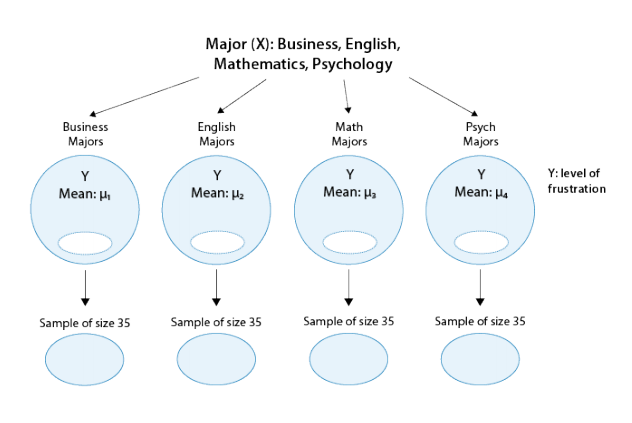

In [60]:
from IPython.display import Image
Image("https://adata.site.wesleyan.edu/files/2017/10/Pic3.png")

In [62]:
np.random.seed(1234)
#Xây dựng dữ liệu mô phỏng
major = ['Business', 'English', 'Math','Psych']
sinh_vien_nganh = np.random.choice(major, 140, p = [0.25, 0.25, 0.25, 0.25])
diem_trung_binh_bt = np.random.choice(6, 140)

In [65]:
df_sv = pd.DataFrame({'Sinh vien': sinh_vien_nganh, 'TB': diem_trung_binh_bt})
df_sv.head(4)

,Sinh vien,TB
0,Business,2
1,Math,1
2,English,3
3,Psych,2
